# Task Description
Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model'
s performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.

Reference : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [5]:

import numpy as np 
import pandas as pd 

In [6]:
# import basic liberey

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy


from pylab import rcParams
rcParams['figure.figsize'] = 16,12      # its for graph size wight, height
RANDOM_SEED = 101
LABELS = ['Normal', 'Fraud']


In [7]:
# import the dataset
data = pd.read_csv('creditcard.csv', sep=',')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
# Data  preprocessing
# check missing data

data.isnull().sum()

# there is no missing data found

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# check imbalance dataset
data['Class'].value_counts()



0    284315
1       492
Name: Class, dtype: int64

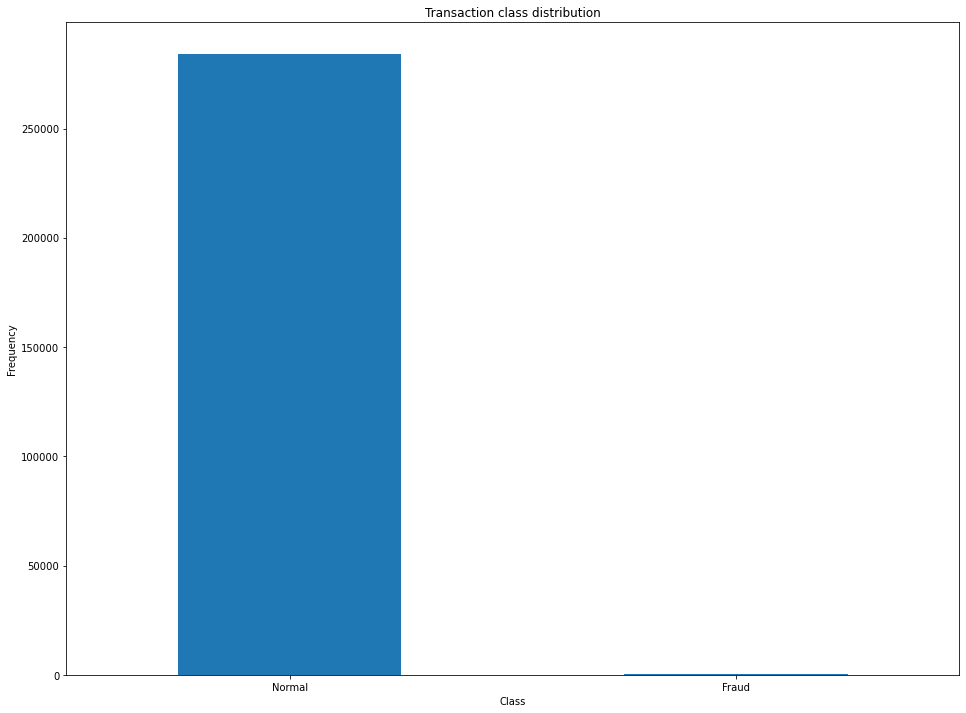

In [11]:
# EDA 
count_xlasses = pd.value_counts(data['Class'], sort=True)
count_xlasses.plot(kind = 'bar', rot = 0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [12]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [13]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

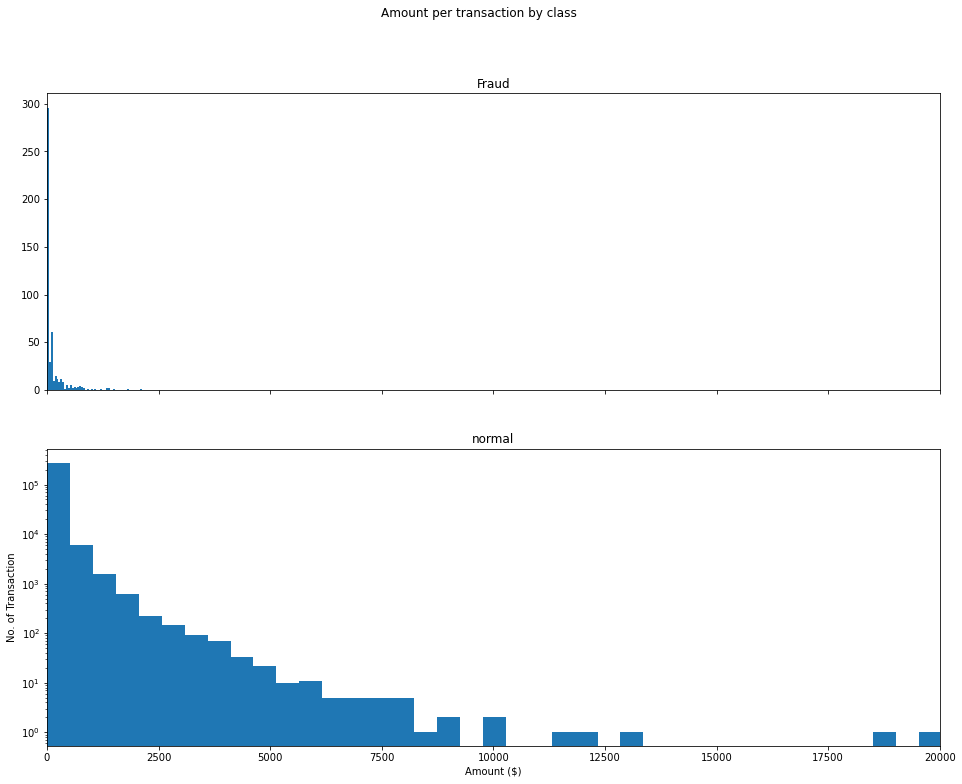

In [15]:

f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

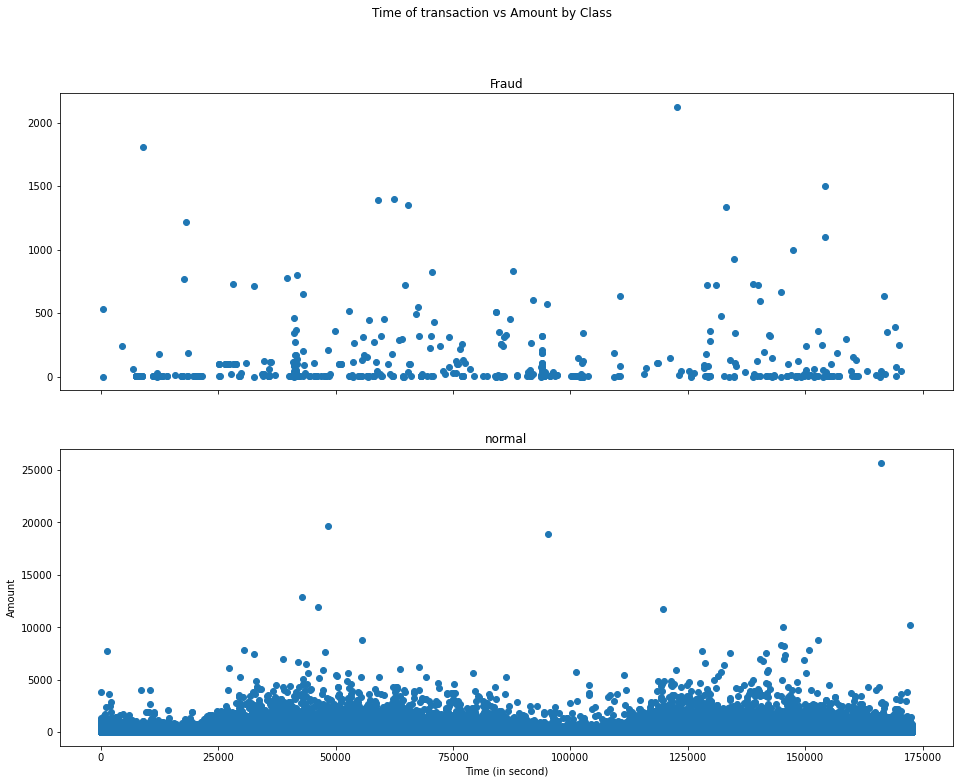

In [16]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')

plt.xlabel("Time (in second)")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

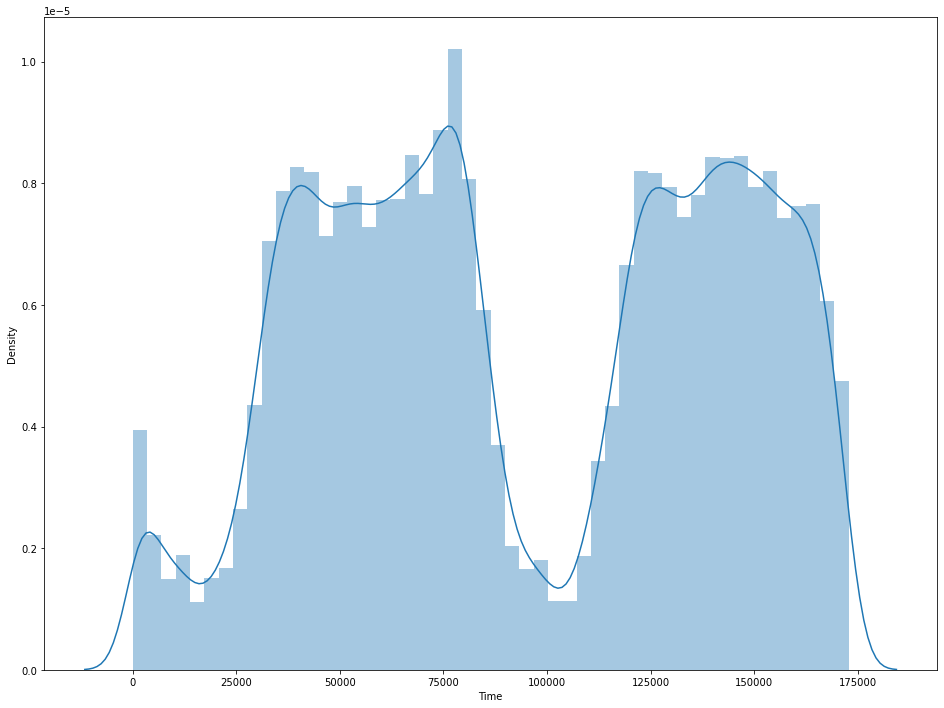

In [17]:
sns.distplot(data['Time'])

In [18]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

In [19]:
print(fraud.shape)
print(valid.shape)

(492, 31)
(284315, 31)


In [20]:
outlier_faction = len(fraud)/float(len(valid))

outlier_faction

0.0017304750013189597

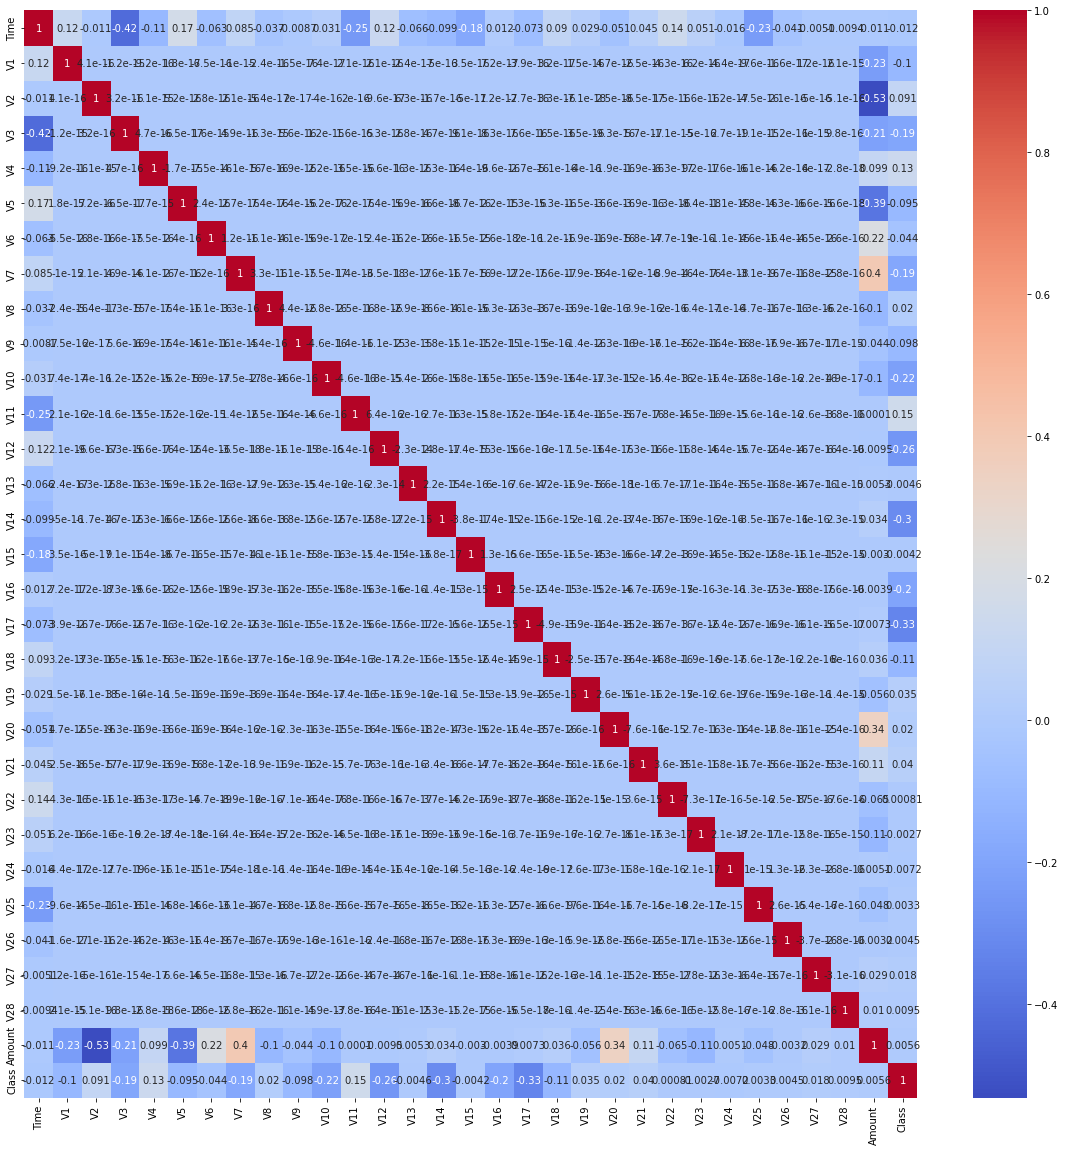

In [21]:
# Correlotion part

# Heat Map
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='coolwarm')

In [22]:
columns = data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [23]:
# Split the data into target variable anf feature variable

# x = data.iloc[:,0:31]
# x = data.drop(['Class'], axis=1)

columns = [c for c in columns if c not in ["Class"]]
target = 'Class'


In [24]:
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [25]:
target

'Class'

In [26]:
columns = [c for c in columns if c not in ["Class"]]
target = 'Class'
state = np.random.RandomState(101)
x = data[columns]
y = data[target]
x_outlier = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [27]:
# Split the data into train and test for buling the model and prediction.

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70, random_state=101)

In [29]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
85606,60850.0,-2.181700,-1.081516,-0.455676,-0.469416,3.181412,2.792502,-0.969722,1.514169,-0.270947,...,0.725584,-0.010621,-0.765830,-0.033177,1.036212,0.164195,0.237369,0.210396,-0.169310,55.83
88765,62281.0,0.966174,-0.436168,1.236803,0.735214,-0.525551,1.525499,-1.014347,0.704637,1.032686,...,-0.302703,0.040025,0.407304,0.208419,-0.613252,-0.136451,0.427657,0.082106,0.014315,11.50
278969,168560.0,-0.133786,0.980320,-0.256613,-0.764404,1.344491,-0.432592,1.034280,-0.067171,-0.197342,...,-0.111243,-0.306188,-0.898982,-0.068233,-0.083356,-0.549305,0.136005,0.107416,0.194498,0.89
165839,117700.0,1.097971,-0.974633,-0.599038,4.389753,-0.434954,0.319253,0.375607,-0.096094,-0.303140,...,0.511187,0.332687,0.323639,-0.280183,0.076090,-0.045856,0.088169,-0.079773,0.024493,410.62
223172,143273.0,0.132701,0.632600,-0.047073,-0.618284,0.648191,-0.620230,1.104518,-0.239833,-0.237938,...,-0.043306,0.197347,0.534069,-0.143050,-0.681905,-0.150104,0.353270,-0.001355,0.030638,52.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55293,46863.0,1.175185,-1.047414,0.893852,-0.731787,-1.459090,0.044510,-1.227875,0.288548,-0.444711,...,0.093387,0.478989,1.133335,-0.119320,0.023757,0.253068,-0.037986,0.029675,0.019153,69.99
136767,81857.0,-0.908149,1.105346,1.116745,0.094722,-0.111310,-0.414495,0.272922,0.453303,-0.190528,...,0.015166,-0.171248,-0.383365,-0.166095,-0.089589,0.072182,0.272184,0.195162,0.092772,4.96
204614,135360.0,-1.849226,-0.278038,0.604019,-3.359270,-0.760121,1.540287,-0.376494,0.915975,-1.981568,...,-0.226640,-0.172459,0.193324,-0.228153,-1.659733,0.645542,0.010909,0.482934,0.144529,141.00
214539,139714.0,-0.393043,-0.244334,-2.558414,-0.230203,0.264042,-1.432909,3.238136,-0.757060,-0.050207,...,0.838428,0.345851,0.371331,1.244976,-0.304688,-1.608773,0.206503,-0.040852,0.216571,490.00


In [30]:
x_train.shape

(199364, 30)

In [31]:
x_test.shape

(85443, 30)

In [32]:
y_train.shape

(199364,)

In [33]:
y_test.shape

(85443,)

In [34]:
# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)


LogisticRegression()

In [36]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
print(classification_report(y_train, y_pred_train))

print("######"*50)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.68      0.68      0.68       348

    accuracy                           1.00    199364
   macro avg       0.84      0.84      0.84    199364
weighted avg       1.00      1.00      1.00    199364

############################################################################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.68      0.69      0.68       144

    accuracy                           1.00     85443
   macro avg       0.84      0.84      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [39]:
print(confusion_matrix(y_train, y_pred_train))

print("######"*50)

print(confusion_matrix(y_test, y_pred_test))

[[198904    112]
 [   113    235]]
############################################################################################################################################################################################################################################################################################################
[[85252    47]
 [   45    99]]


In [40]:
print(accuracy_score(y_train, y_pred_train))

print("######"*50)

print(accuracy_score(y_test, y_pred_test))

0.9988714110872575
############################################################################################################################################################################################################################################################################################################
0.9989232587807076


In [41]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_pred_dt_trian = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [43]:
print(accuracy_score(y_train, y_pred_dt_trian))

print("######"*50)

print(accuracy_score(y_test, y_pred_dt_test))

1.0
############################################################################################################################################################################################################################################################################################################
0.9992860737567735


In [44]:
print(confusion_matrix(y_train, y_pred_dt_trian))

print("######"*50)

print(confusion_matrix(y_test, y_pred_dt_test))

[[199016      0]
 [     0    348]]
############################################################################################################################################################################################################################################################################################################
[[85267    32]
 [   29   115]]


In [45]:
from sklearn import tree

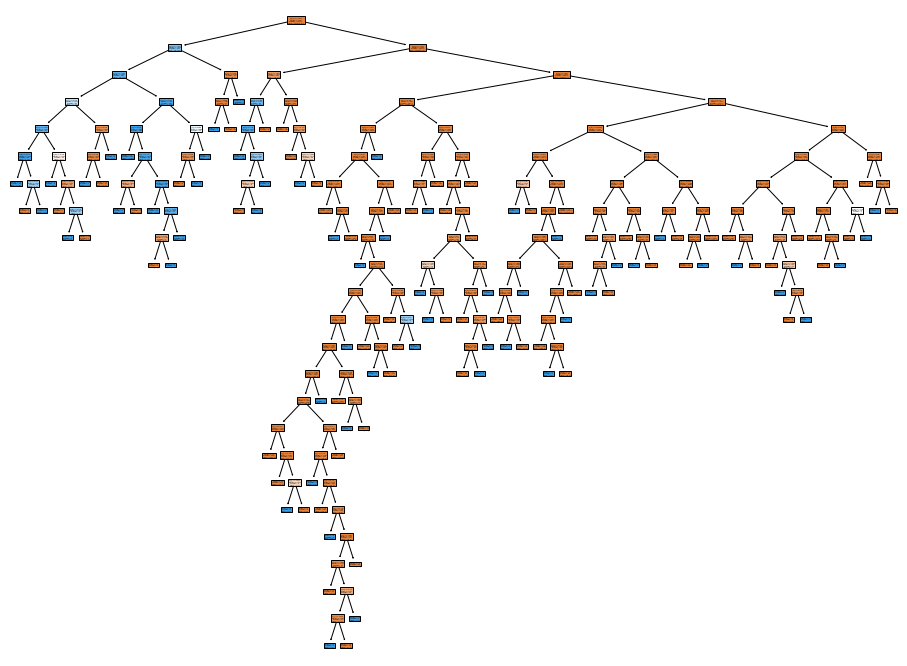

In [46]:
tree.plot_tree(dtree, filled=True)
plt.show()